In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import csv
import random
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression

In [2]:
#import and read csv
rain = "../data_joao/precipitation_new.csv"
rain_df = pd.read_csv(rain)
rain_df

,state,Unnamed: 1,year,month,precipitation
0,AC,1/31/1998,1998,Jan,335.5
1,AC,2/28/1998,1998,Feb,299.4
2,AC,3/31/1998,1998,Mar,396.7
3,AC,4/30/1998,1998,Apr,102.7
4,AC,5/31/1998,1998,May,19.0
...,...,...,...,...,...
5809,TO,7/31/2017,2017,Jul,0.0
5810,TO,8/31/2017,2017,Aug,0.0
5811,TO,9/30/2017,2017,Sep,0.0
5812,TO,10/31/2017,2017,Oct,21.6


In [3]:
# rename columns and select Legal Amazon states
# The Rondonia state (RO) is missing from the Rain data,
new_rain_df = rain_df.drop(["Unnamed: 1", "month"], axis=1)
new_rain_df = new_rain_df.loc[new_rain_df['state'].isin(["AC", "AM", "AP", "MA", "MT","PA", "RR", "TO"])]

In [4]:
#group by year
rain_yeargroup_df = new_rain_df.groupby(["year"])
rain_year_sum_df = rain_yeargroup_df.sum()["precipitation"]
rain_year_sum_df = pd.DataFrame(rain_year_sum_df)

rain_year_sum_df = rain_year_sum_df.reset_index()
rain_year_sum_df

,year,precipitation
0,1998,16444.3
1,1999,18499.7
2,2000,18510.7
3,2001,16345.5
4,2002,15949.3
5,2003,15834.6
6,2004,17218.5
7,2005,16782.1
8,2006,19357.0
9,2007,17513.3


In [5]:
# axis and ticks
x_axis = list(rain_year_sum_df.year)
tick_locations = [value for value in x_axis]

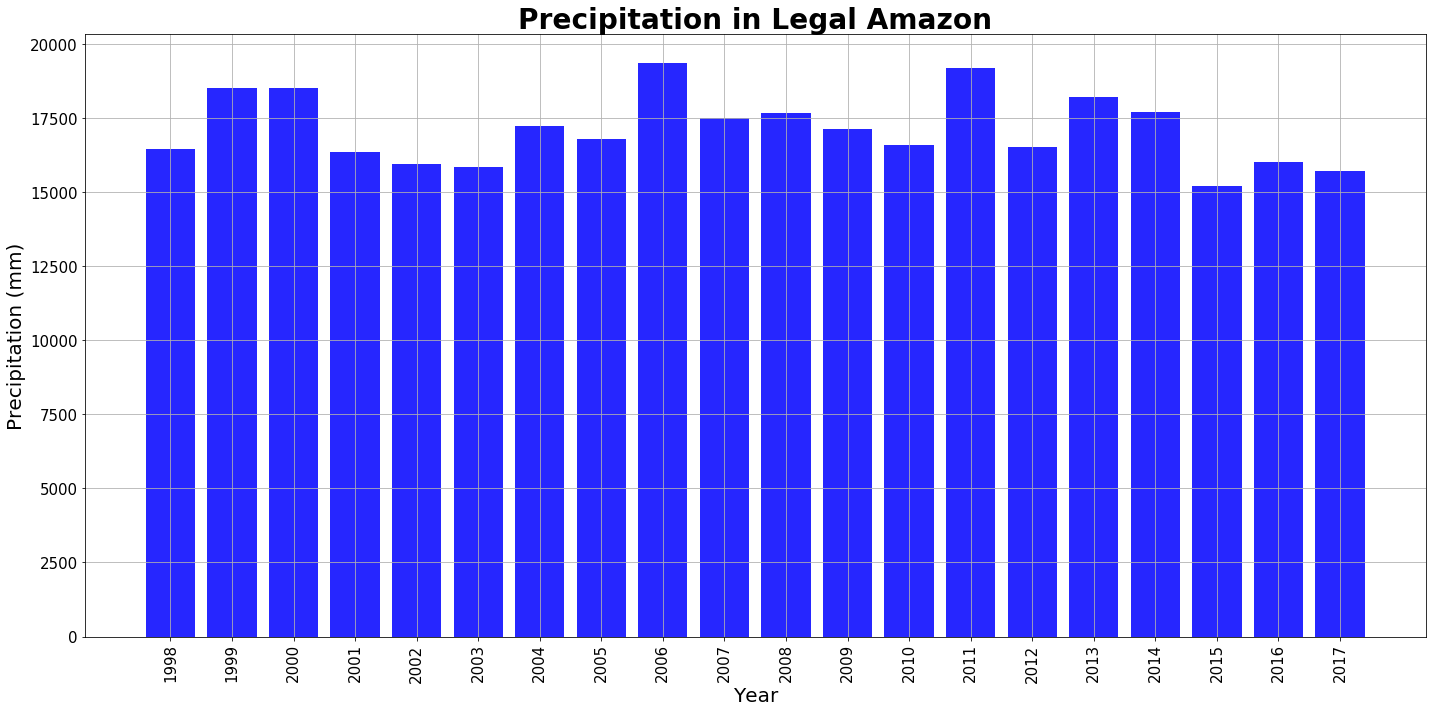

In [6]:
# Create a bar graph for Annual Precipitation in Legal Amazon.
fig, ax = plt.subplots(figsize=(20, 10))

for index, row in rain_year_sum_df.iterrows():
    ax.bar(rain_year_sum_df["year"][index], rain_year_sum_df["precipitation"][index],  color='b', alpha=0.85, align="center")

ax.set_title("Precipitation in Legal Amazon", fontweight = "bold", fontsize = 28)
plt.xticks(tick_locations, x_axis, rotation=90)
plt.tick_params(labelsize=15)
ax.set_xlabel("Year", fontsize = 20)
ax.set_ylabel("Precipitation (mm)", fontsize = 20)
plt.tight_layout()
ax.grid()
#save figure
plt.savefig("../output_data/images/rain_legalAmazon.png", dpi=fig.dpi)
plt.show()

In [8]:
# group the data by year and state

rain_stategroup = new_rain_df.groupby(["state", "year"])
rain_state_sum = state.sum()["precipitation"]
rain_state_sum_df = pd.DataFrame(rain_state_sum)

rain_state_sum_df = rain_state_sum_df.reset_index()
# save csv
rain_state_sum_df.to_csv("data/amazon_precipitation.csv", sep=',')
rain_state_sum_df

FileNotFoundError: [Errno 2] No such file or directory: 'data/amazon_precipitation.csv'

In [ ]:
# legend
states = np.unique(rain_state_sum_df["state"])

#create line graph Annual rain by state

fig, ax = plt.subplots(figsize=(20, 10), )

ax = sns.lineplot(x = 'year', y = "precipitation", data = rain_state_sum_df, hue = 'state', lw = 3, 
                  err_style = None,)

tick_locations = [value for value in x_axis]
handles = states
plt.xticks(tick_locations, x_axis, rotation=90)
ax.set_xlabel("Year",fontsize = 28)
ax.set_ylabel("Precipitation (mm)",fontsize = 28)
ax.set_title('Precipitation by State by Year', fontweight = "bold", fontsize = 30)
ax.legend(handles, loc="best", prop={'size': 12})
plt.tight_layout()
ax.grid()
plt.savefig("../output_data/images/rain_state_year.png", dpi=fig.dpi)
plt.show()

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=8)